In [183]:
%matplotlib widget
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import mplcursors
from gerrychain import MarkovChain
from gerrychain import Graph, Partition, MarkovChain
from gerrychain.updaters import Tally
from gerrychain.proposals import recom
from gerrychain.accept import always_accept
from gerrychain.constraints import within_percent_of_ideal_population



In [176]:
nv_election_data = pd.read_csv('Nevada/2020-nv-precinct-general.csv')
#nv_election_data['votes'] = nv_election_data['votes'].apply(lambda x: max(x, 0))
#nv_election_data['precinct'] = pd.to_numeric(nv_election_data['precinct'], errors='coerce')
#nv_election_data = nv_election_data[nv_election_data['precinct'].notna()]
#nv_election_data['precinct'] = nv_election_data['precinct'].astype(int).astype(str).str.zfill(6).str.strip()
nv_election_data.head()

/var/folders/_j/y8yrmv5123b_6yhhdstzl2bm0000gn/T/ipykernel_35714/642866225.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  nv_election_data = pd.read_csv('Nevada/2020-nv-precinct-general.csv')


,precinct,office,party_detailed,party_simplified,mode,votes,county_name,county_fips,jurisdiction_name,jurisdiction_fips,...,stage,state,special,writein,state_po,state_fips,state_cen,state_ic,date,readme_check
0,1038,US HOUSE,DEMOCRAT,DEMOCRAT,TOTAL,185,CLARK,32003,CLARK,32003,...,GEN,NEVADA,False,False,NV,32,88,65,2020-11-03,False
1,1038,US HOUSE,LIBERTARIAN,LIBERTARIAN,TOTAL,0,CLARK,32003,CLARK,32003,...,GEN,NEVADA,False,False,NV,32,88,65,2020-11-03,False
2,1038,US HOUSE,INDEPENDENT,OTHER,TOTAL,6,CLARK,32003,CLARK,32003,...,GEN,NEVADA,False,False,NV,32,88,65,2020-11-03,False
3,1038,US HOUSE,REPUBLICAN,REPUBLICAN,TOTAL,225,CLARK,32003,CLARK,32003,...,GEN,NEVADA,False,False,NV,32,88,65,2020-11-03,False
4,1039,US HOUSE,DEMOCRAT,DEMOCRAT,TOTAL,378,CLARK,32003,CLARK,32003,...,GEN,NEVADA,False,False,NV,32,88,65,2020-11-03,False


In [218]:
nv_population_data = pd.read_csv('Nevada/nv_pl2020_b.csv')
nv_population_data.head()

/var/folders/_j/y8yrmv5123b_6yhhdstzl2bm0000gn/T/ipykernel_35714/3677919850.py:1: DtypeWarning: Columns (29,31,37,38,55) have mixed types. Specify dtype option on import or set low_memory=False.
  nv_population_data = pd.read_csv('Nevada/nv_pl2020_b.csv')


,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,...,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,NV,750,0,0,0,39794,7500000US320019501001000,320019501001000,4,...,0,0,0,0,0,0,0,0,0,0
1,PLST,NV,750,0,0,0,39795,7500000US320019501001001,320019501001001,4,...,0,0,0,0,0,0,0,0,0,0
2,PLST,NV,750,0,0,0,39796,7500000US320019501001002,320019501001002,4,...,0,0,0,0,0,0,0,0,0,0
3,PLST,NV,750,0,0,0,39797,7500000US320019501001003,320019501001003,4,...,0,0,0,0,0,0,0,0,0,0
4,PLST,NV,750,0,0,0,39798,7500000US320019501001004,320019501001004,4,...,0,0,0,0,0,0,0,0,0,0


In [217]:
nv_precint_data = gpd.read_file('Nevada/tl_2020_08_vtd20.zip')
nv_precint_data.head()

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,08,017,017001,08017017001,A,Cheyenne 001,Cheyenne 001,00,G5240,N,852538246,56670,+38.8278294,-102.1504709,"POLYGON ((-102.27912 39.04635, -102.27756 39.0..."
1,08,017,017002,08017017002,A,Cheyenne 002,Cheyenne 002,00,G5240,N,401715916,10180,+38.7985601,-102.3000778,"POLYGON ((-102.3555 38.81684, -102.35549 38.81..."
2,08,017,017003,08017017003,A,Cheyenne 003,Cheyenne 003,00,G5240,N,1054899076,169197,+38.8207677,-102.4959030,"POLYGON ((-102.62095 38.69298, -102.61838 38.6..."
3,08,017,017004,08017017004,A,Cheyenne 004,Cheyenne 004,00,G5240,N,1355064186,4671089,+38.8157953,-102.7746695,"POLYGON ((-103.01602 38.77912, -103.01599 38.7..."
4,08,017,017005,08017017005,A,Cheyenne 005,Cheyenne 005,00,G5240,N,941496536,3258993,+38.8679682,-103.0540458,"POLYGON ((-103.1727 38.62502, -103.17262 38.62..."


In [216]:
nv_precint_pl = nv_precint_data.merge(nv_population_data, left_on='GEOID20', right_on='GEOID')
nv_precint_pl

,STATEFP20,COUNTYFP20,VTDST20,GEOID20_x,VTDI20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,...,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010


In [14]:
co_election_data = pd.read_csv('Colorado/2020-co-precinct-general.csv')

/var/folders/_j/y8yrmv5123b_6yhhdstzl2bm0000gn/T/ipykernel_35714/2197064480.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  co_election_data = pd.read_csv('Colorado/2020-co-precinct-general.csv')


In [18]:
ut_election_data = pd.read_csv('Utah/2020-ut-precinct-general.csv')

/var/folders/_j/y8yrmv5123b_6yhhdstzl2bm0000gn/T/ipykernel_35714/420598495.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  ut_election_data = pd.read_csv('Utah/2020-ut-precinct-general.csv')


In [ ]:
nv_precinct_boundaries = gpd.read_file('tl_2020_08_vtd20.zip')
#precinct_boundaries['VTDST20'] = precinct_boundaries['VTDST20'].astype(str).str.strip()
nv_precinct_boundaries['VTDST20']

0       017001
1       017002
2       017003
3       017004
4       017005
         ...  
3103    023006
3104    023005
3105    023002
3106    023001
3107    023003
Name: VTDST20, Length: 3108, dtype: object

In [ ]:
nv_congressional_districts = gpd.read_file('tl_rd22_08_cd118_whole_block.zip')
nv_congressional_districts

,STATEFP20,GEOID20,CD118FP,NAMELSAD20,LSAD20,CDSESSN,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,08,0801,01,Congressional District 1,C2,118,G5200,N,398604883,4281287,+39.7618502,-104.8811054,"POLYGON ((-105.10992 39.62716, -105.10992 39.6..."
1,08,0802,02,Congressional District 2,C2,118,G5200,N,29642544090,245315311,+40.2958195,-106.2068614,"POLYGON ((-107.44259 40.33476, -107.4362 40.33..."
2,08,0803,03,Congressional District 3,C2,118,G5200,N,129370965177,353178303,+38.4582100,-106.8835657,"POLYGON ((-109.0602 38.27824, -109.06015 38.29..."
3,08,0804,04,Congressional District 4,C2,118,G5200,N,83237478531,408669885,+39.3183492,-103.2487264,"POLYGON ((-105.32922 39.12969, -105.32915 39.1..."
4,08,0805,05,Congressional District 5,C2,118,G5200,N,3811807055,6619377,+38.8072738,-104.6617431,"POLYGON ((-105.07253 38.8084, -105.07237 38.81..."
5,08,0806,06,Congressional District 6,C2,118,G5200,N,794099833,11213344,+39.6805811,-104.7841143,"POLYGON ((-105.15733 39.59805, -105.1561 39.59..."
6,08,0807,07,Congressional District 7,C2,118,G5200,N,18547350651,100876431,+38.8868093,-105.6358333,"POLYGON ((-106.59903 39.03627, -106.59894 39.0..."
7,08,0808,08,Congressional District 8,C2,118,G5200,N,2615896744,55612462,+40.1777459,-104.8094619,"POLYGON ((-105.1356 40.34884, -105.13558 40.34..."


<Axes: >

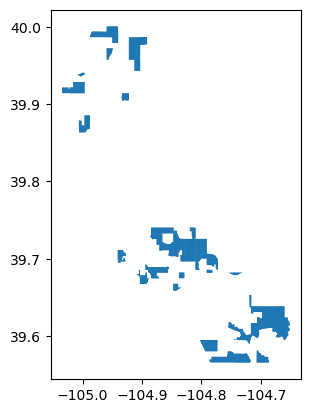

In [ ]:
merged_ED_CD_data = nv_precinct_boundaries.merge(nv_election_data, left_on='VTDST20', right_on='precinct')
merged_ED_CD_data.plot()